# Performing the EDA (Exploratory Data Analysis) & finding out the best fitted Model

## Importing Necessary Libraries

In [147]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Retrieving dataset and Converting it into dataframe

In [148]:
df = pd.read_csv(r'C:\Users\Royce\Desktop\Final Project ITV\Data-processed/crop_recommendation.csv')

## Exploring the data

In [149]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,82,36,42,20.879744,82.002744,6.502985,202.935536,rice
1,71,54,42,21.770462,80.319644,7.038096,226.655537,rice
2,72,51,38,23.004459,82.320763,7.840207,263.964248,rice
3,85,49,44,26.491096,80.158363,6.980401,242.864034,rice
4,91,48,35,20.130175,81.604873,7.628473,262.717340,rice


In [150]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,117,16,26,26.774637,66.413269,6.780064,177.774507,coffee
2196,85,35,34,27.417112,56.636362,6.086922,127.924610,coffee
2197,106,17,33,24.131797,67.225123,6.362608,173.322839,coffee
2198,115,27,32,26.272418,52.127394,6.758793,127.175293,coffee
2199,118,38,26,23.603016,60.396475,6.779833,140.937041,coffee


In [151]:
df.size

17600

In [152]:
df.shape

(2200, 8)

In [153]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [154]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [155]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [156]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

## Data Visualization

### Bivariate Analysis

<Axes: xlabel='label', ylabel='N'>

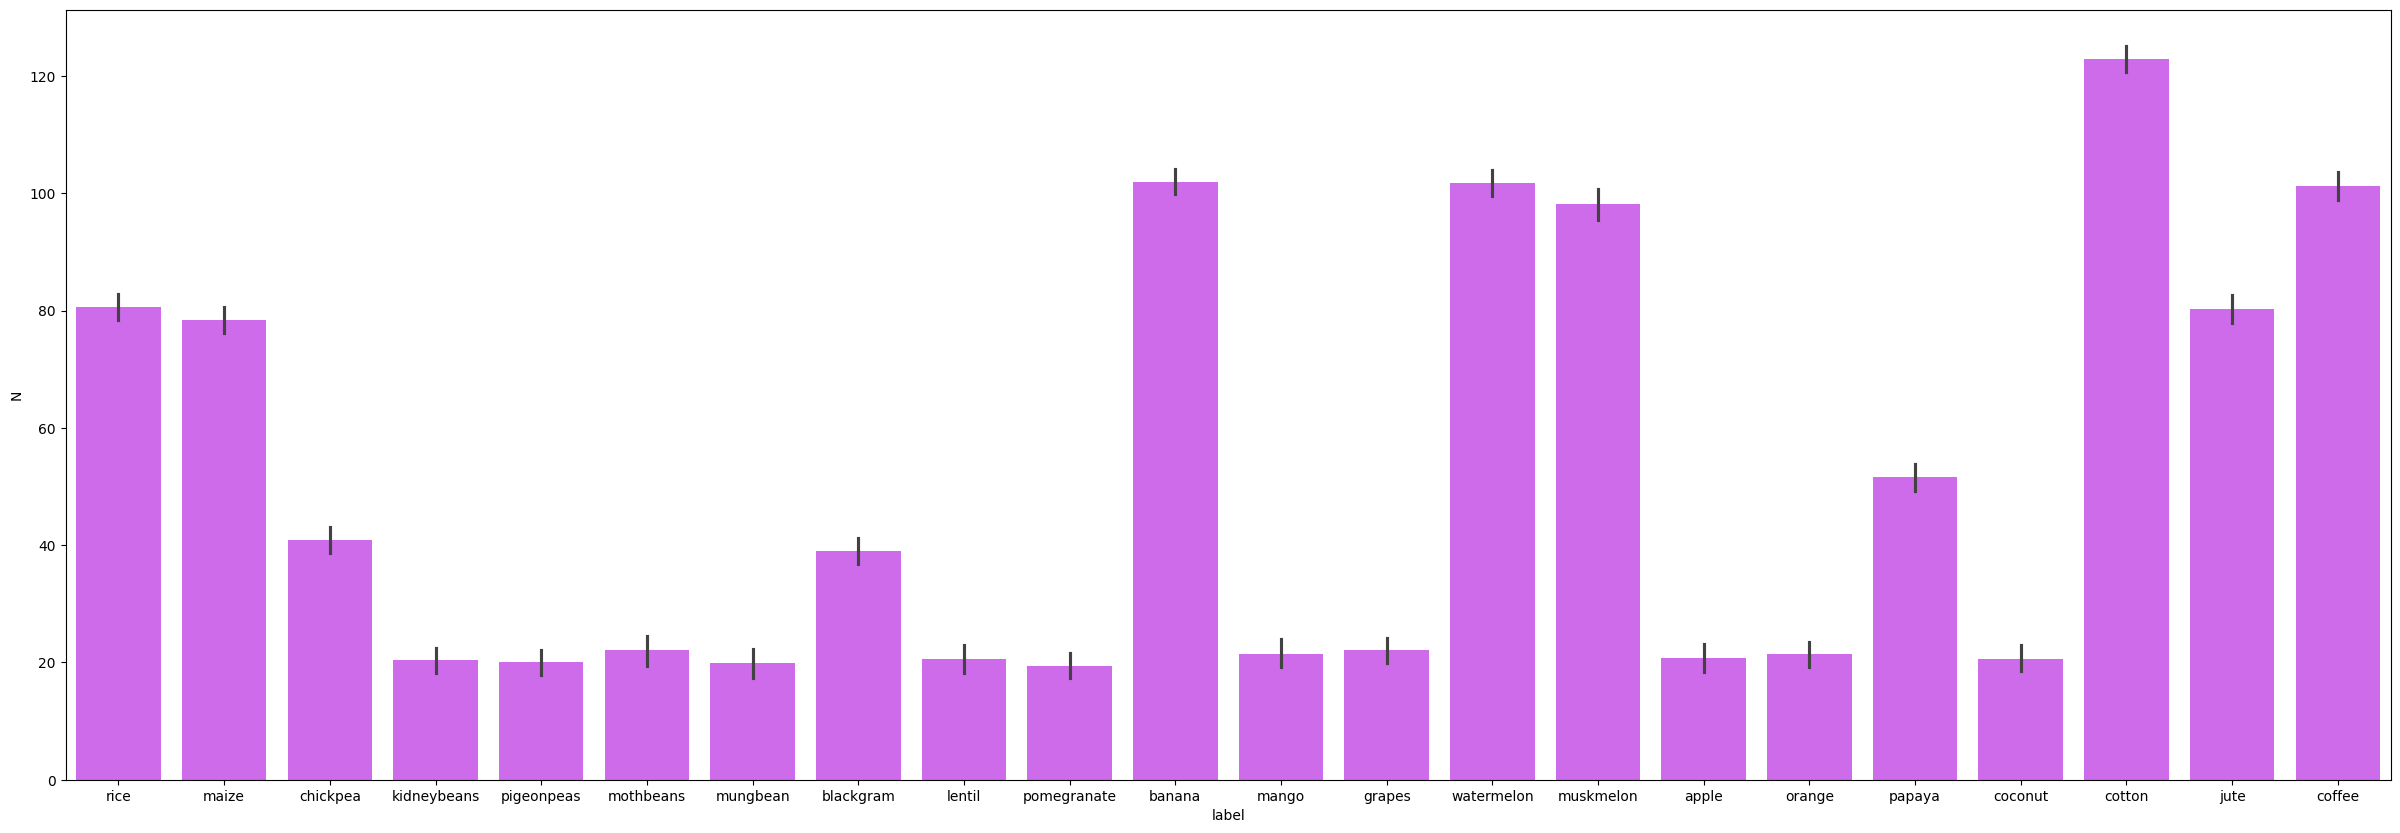

In [157]:
plt.figure(figsize=(30,10))
sns.barplot(x='label',y='N',data=df,color="#DA56FF")

##### As we can see hear "cotton"  requires more "Nitrogen" as compare to other crops

<Axes: xlabel='label', ylabel='P'>

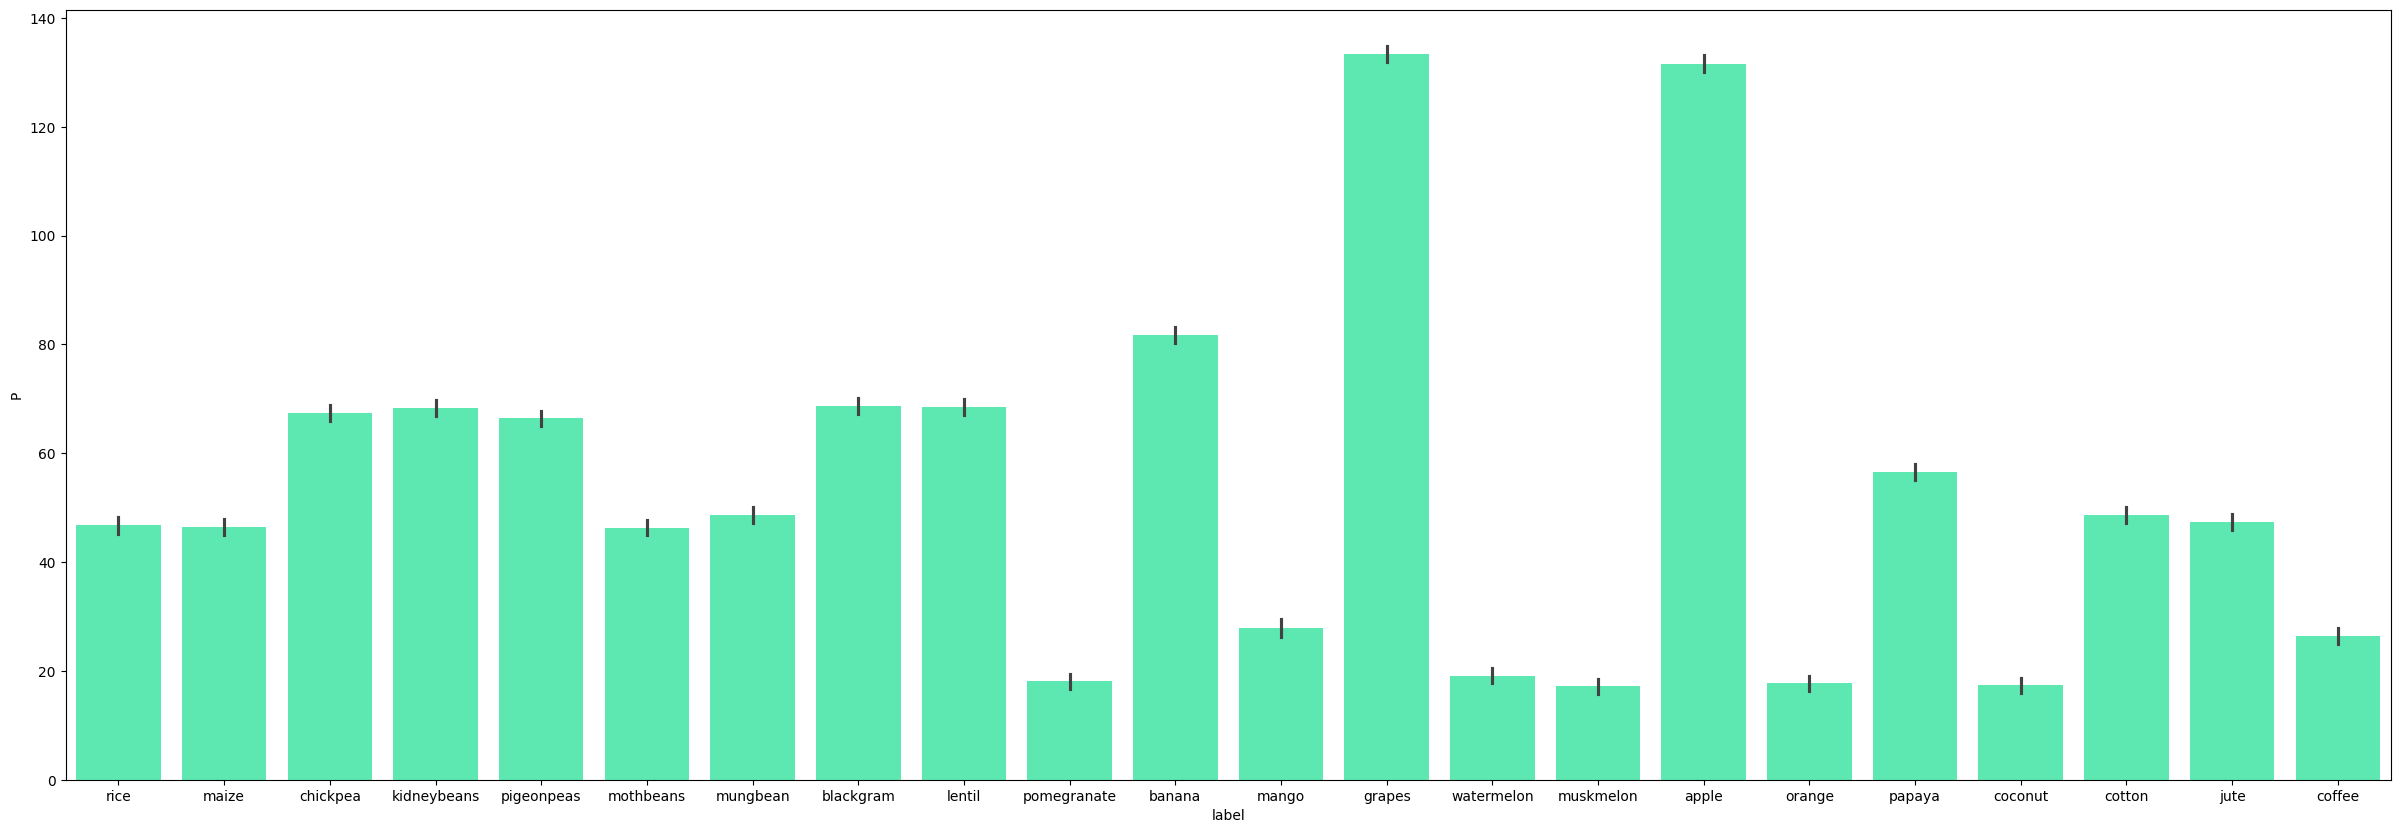

In [158]:
plt.figure(figsize=(30,10))
sns.barplot(x='label',y='P',data=df,color="#47FFB5")

##### As we can see hear "Grapes" & "Apple" requires more "Phosphorus" as compare to other crops

<Axes: xlabel='label', ylabel='K'>

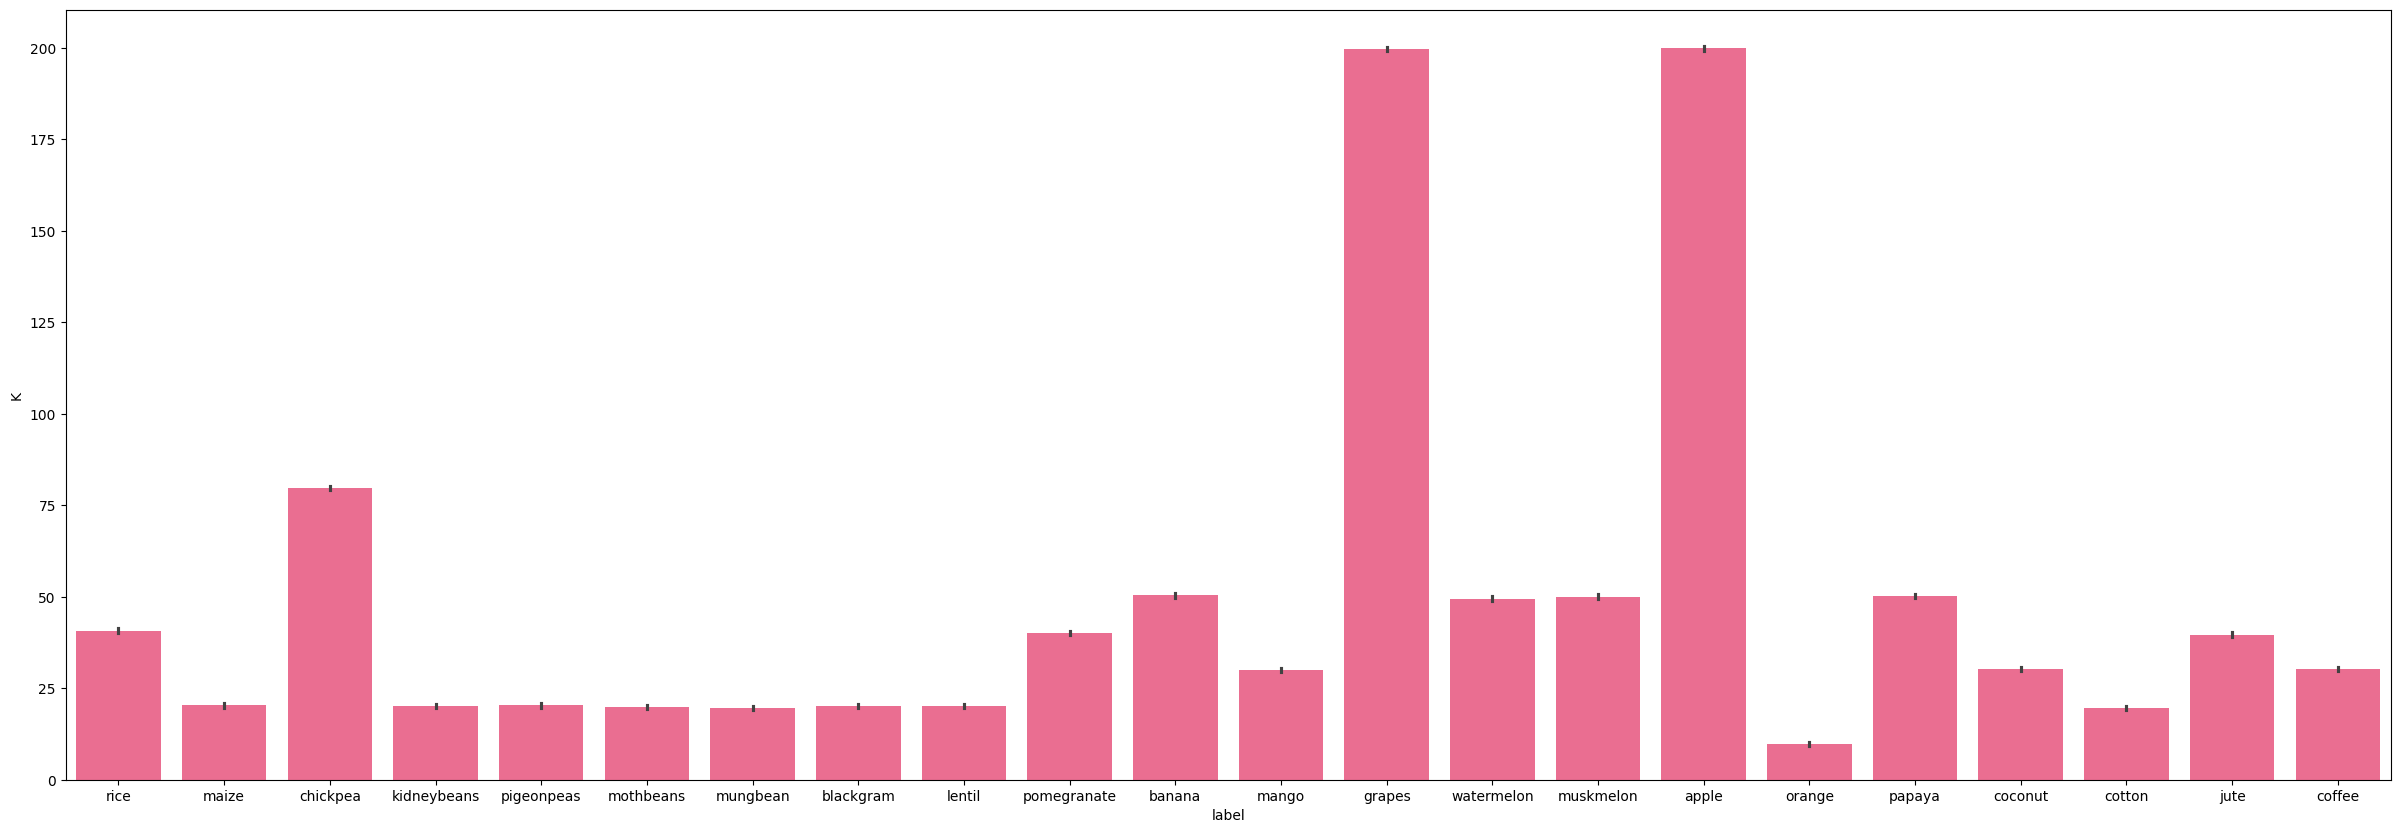

In [159]:
plt.figure(figsize=(30,10))
sns.barplot(x='label',y='K',data=df,color="#FF5988")

##### As we can see hear "Grapes" & "Apple" requires more "Potassium" as compare to other crops

<Axes: xlabel='label', ylabel='temperature'>

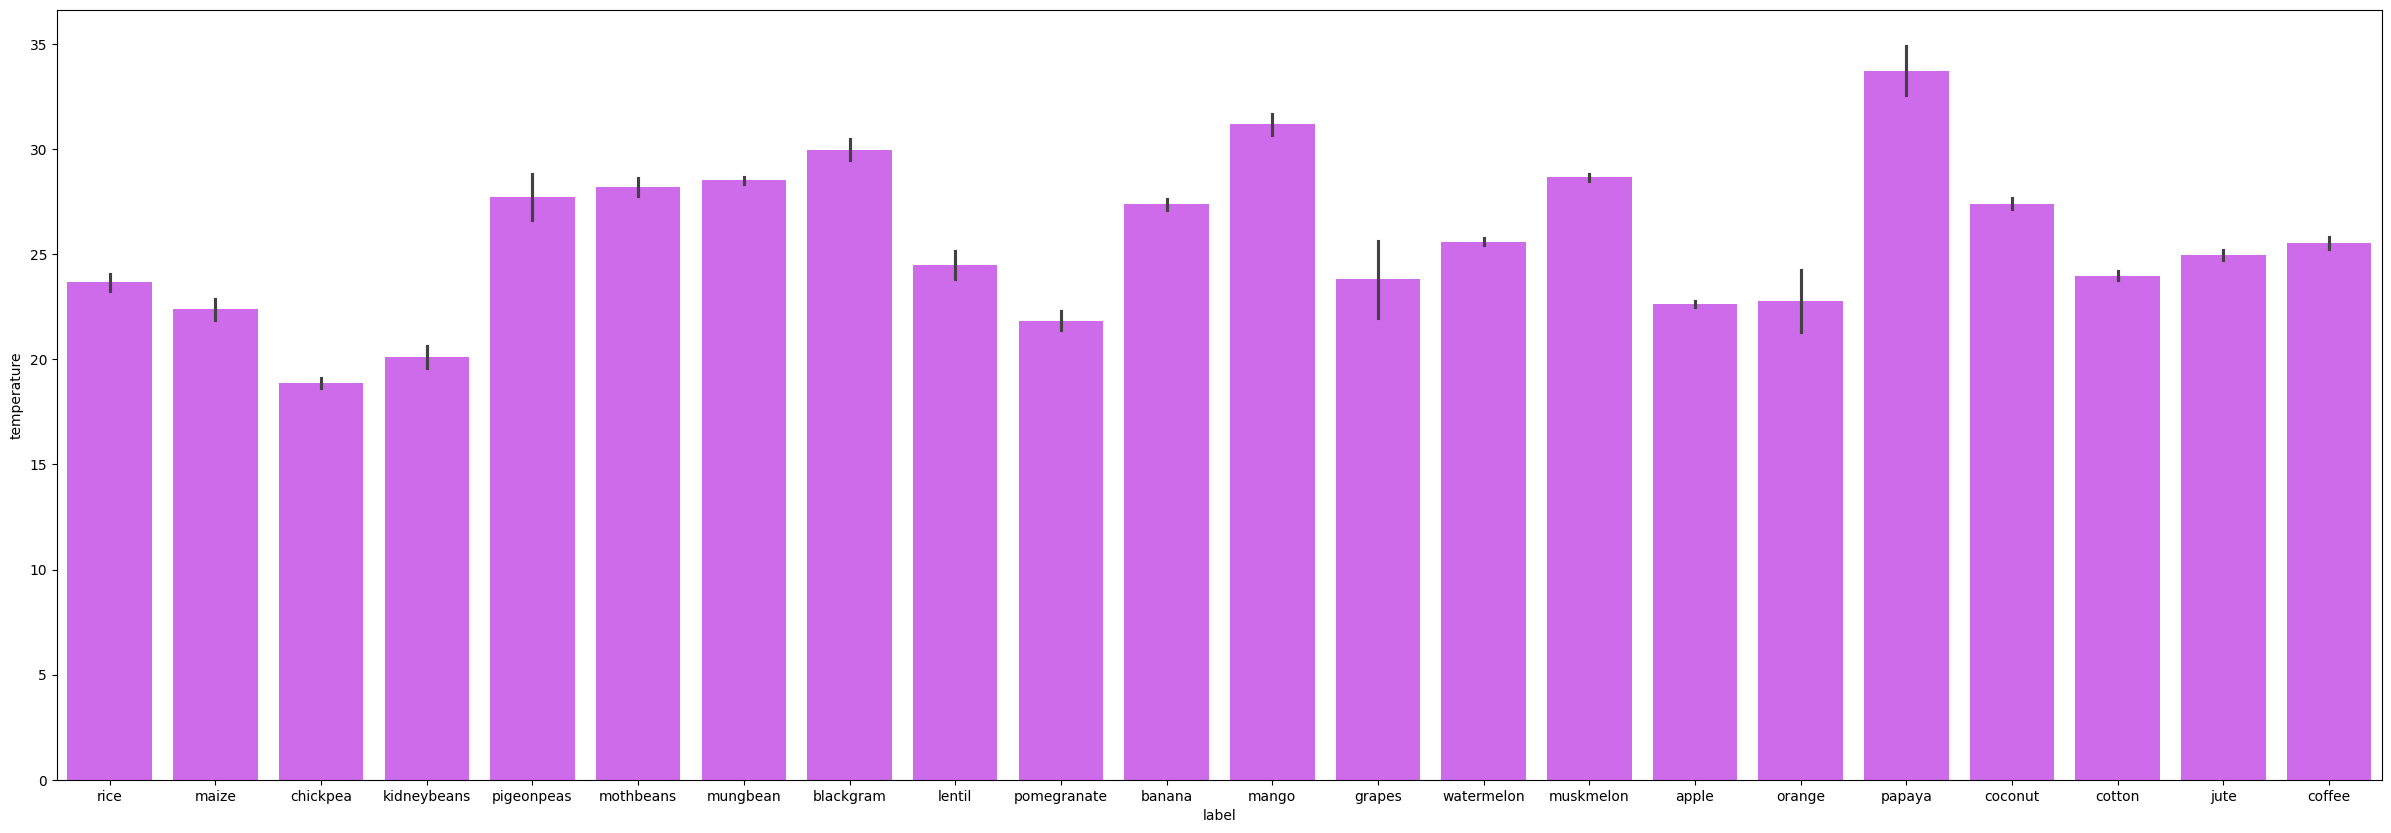

In [160]:
plt.figure(figsize=(30,10))
sns.barplot(x='label',y='temperature',data=df,color="#DA56FF")

##### As we can see hear "Temperature" is major factor for all the crops

<Axes: xlabel='label', ylabel='humidity'>

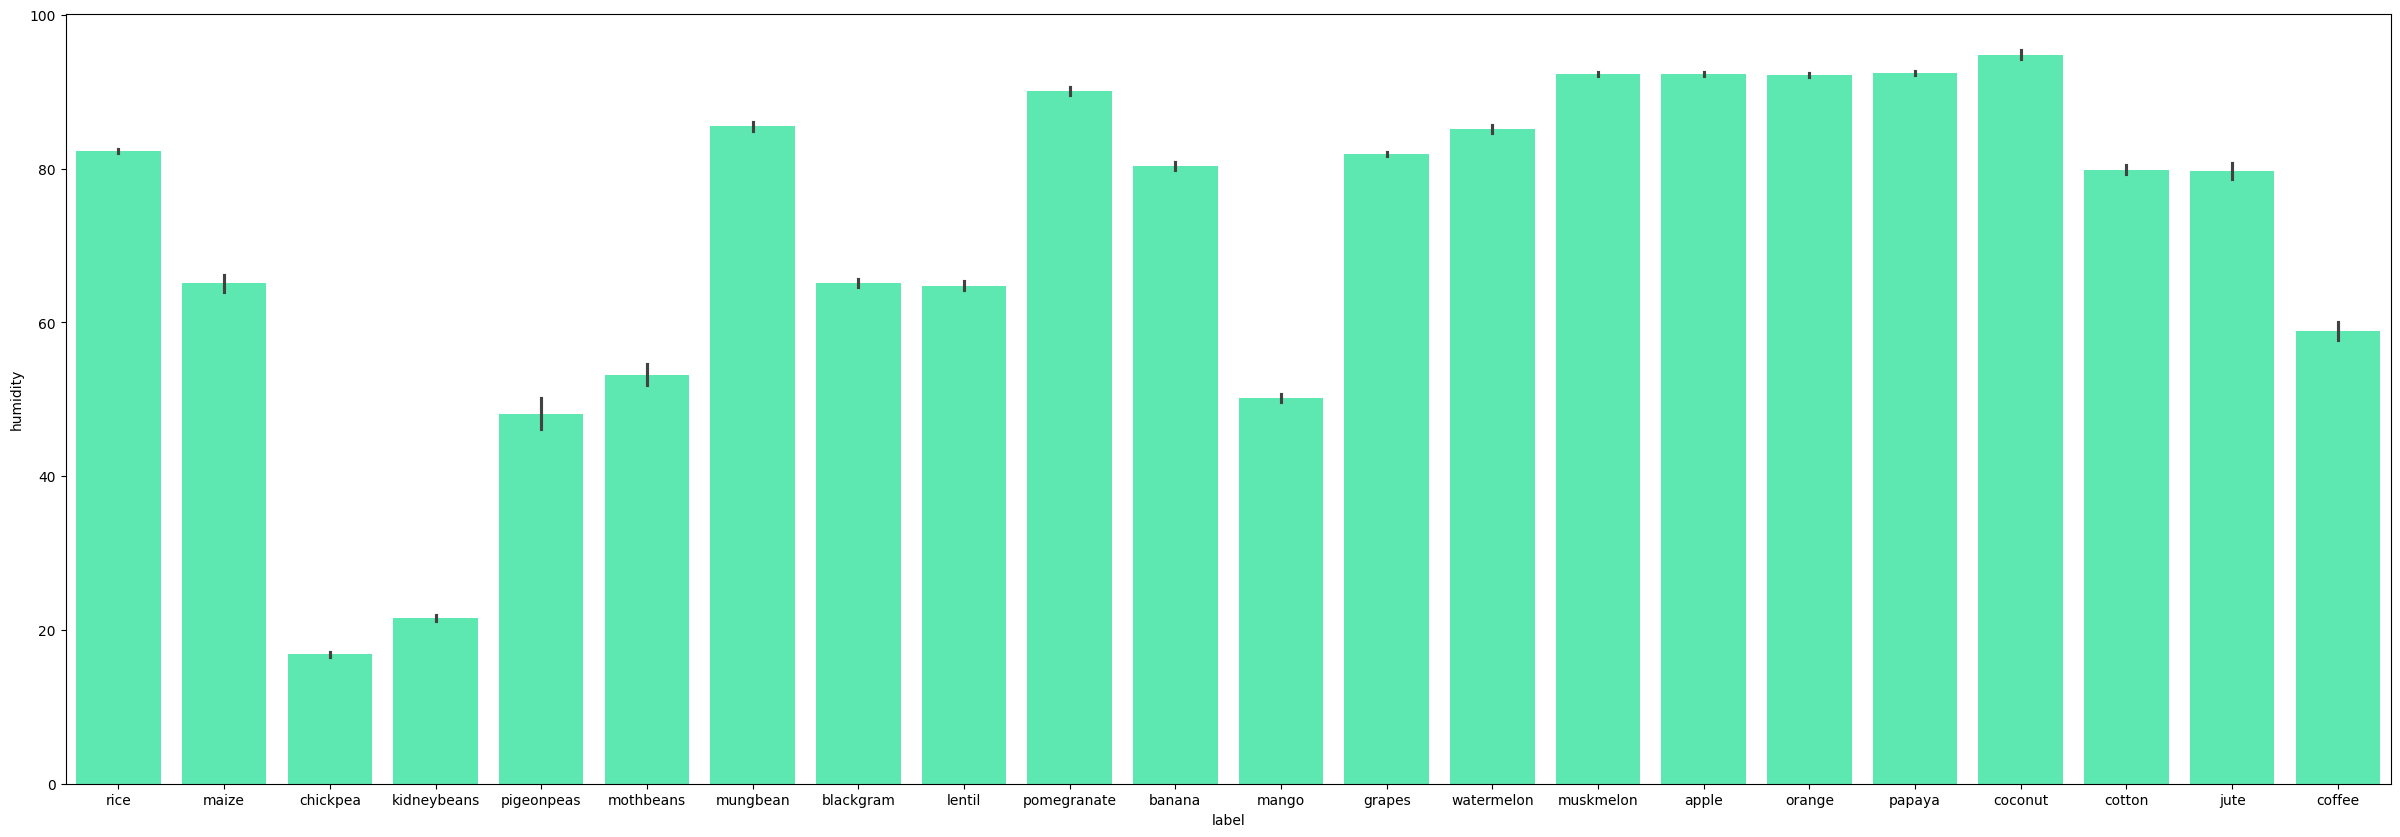

In [161]:
plt.figure(figsize=(30,10))
sns.barplot(x='label',y='humidity',data=df,color="#47FFB5")

##### As we can see hear "Humidity" is also a major factor for all the crops

<Axes: xlabel='label', ylabel='ph'>

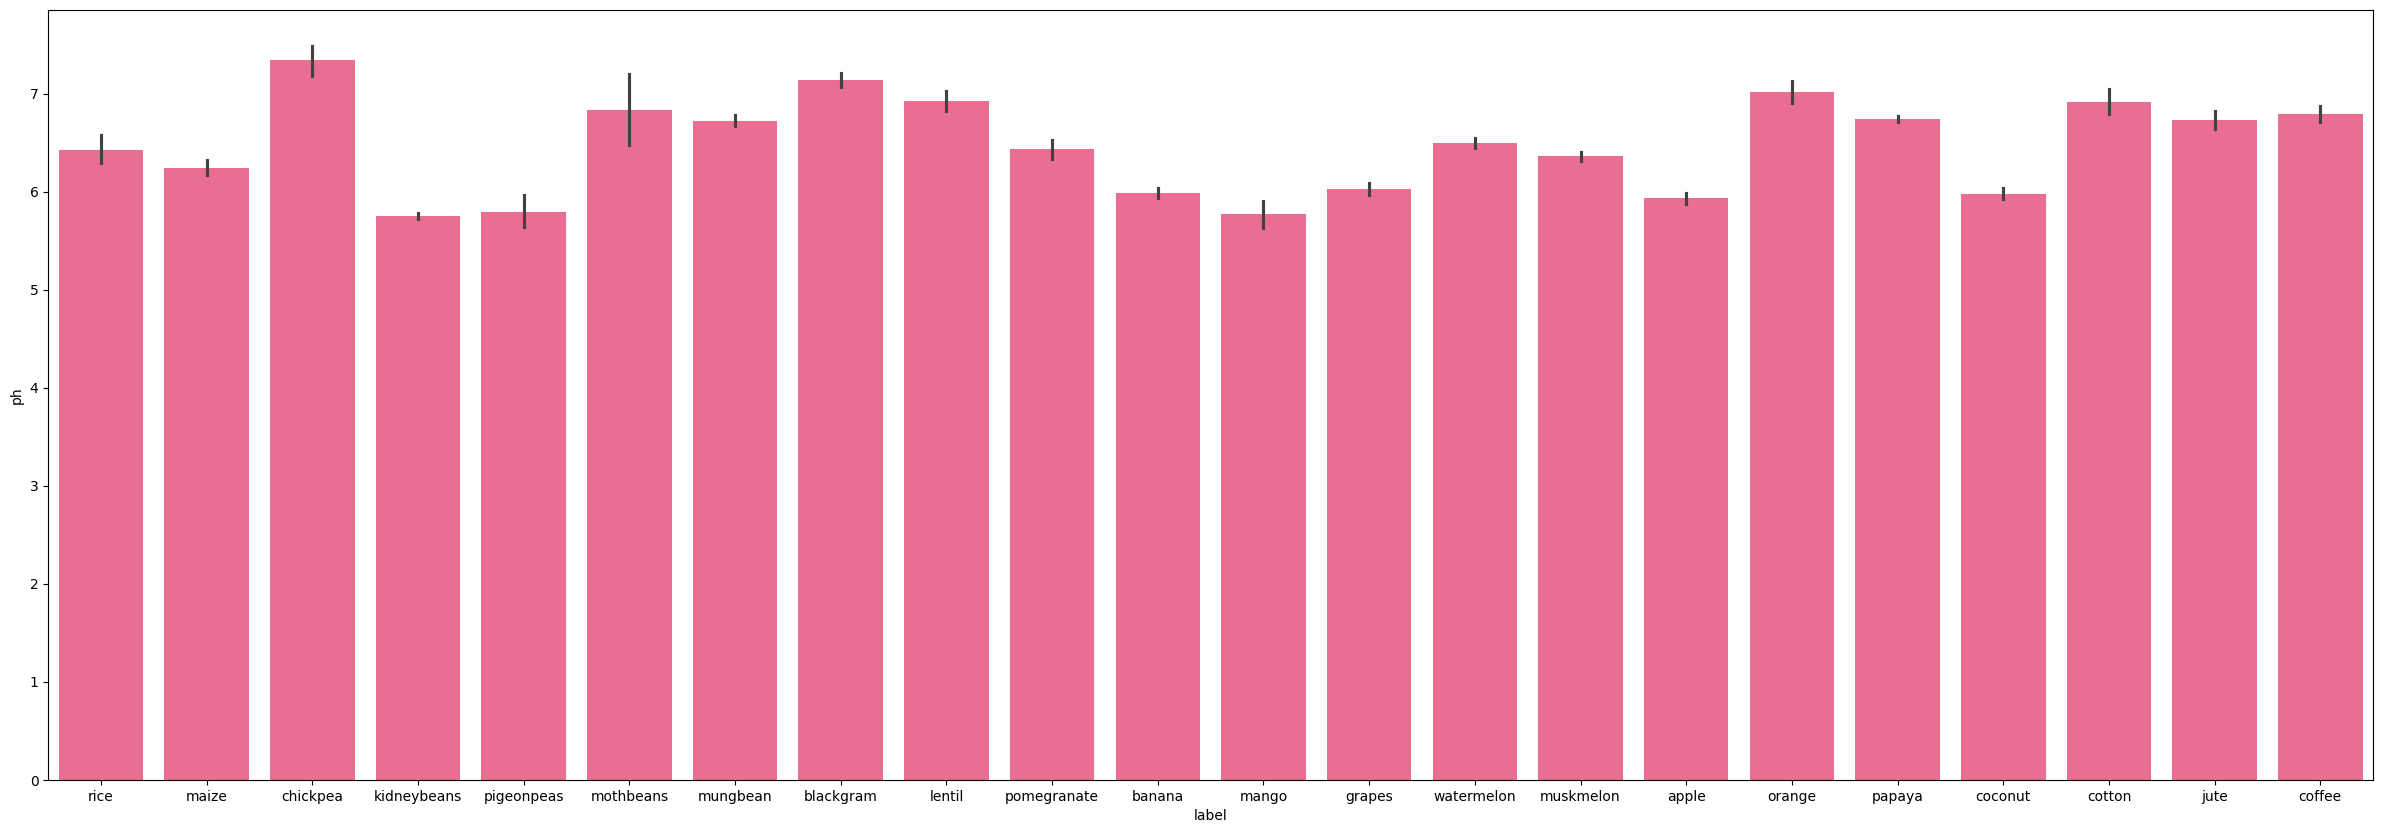

In [162]:
plt.figure(figsize=(30,10))
sns.barplot(x='label',y='ph',data=df,color="#FF5988")

##### As we can see hear "Ph" is also a major factor for all the crops

<Axes: xlabel='label', ylabel='rainfall'>

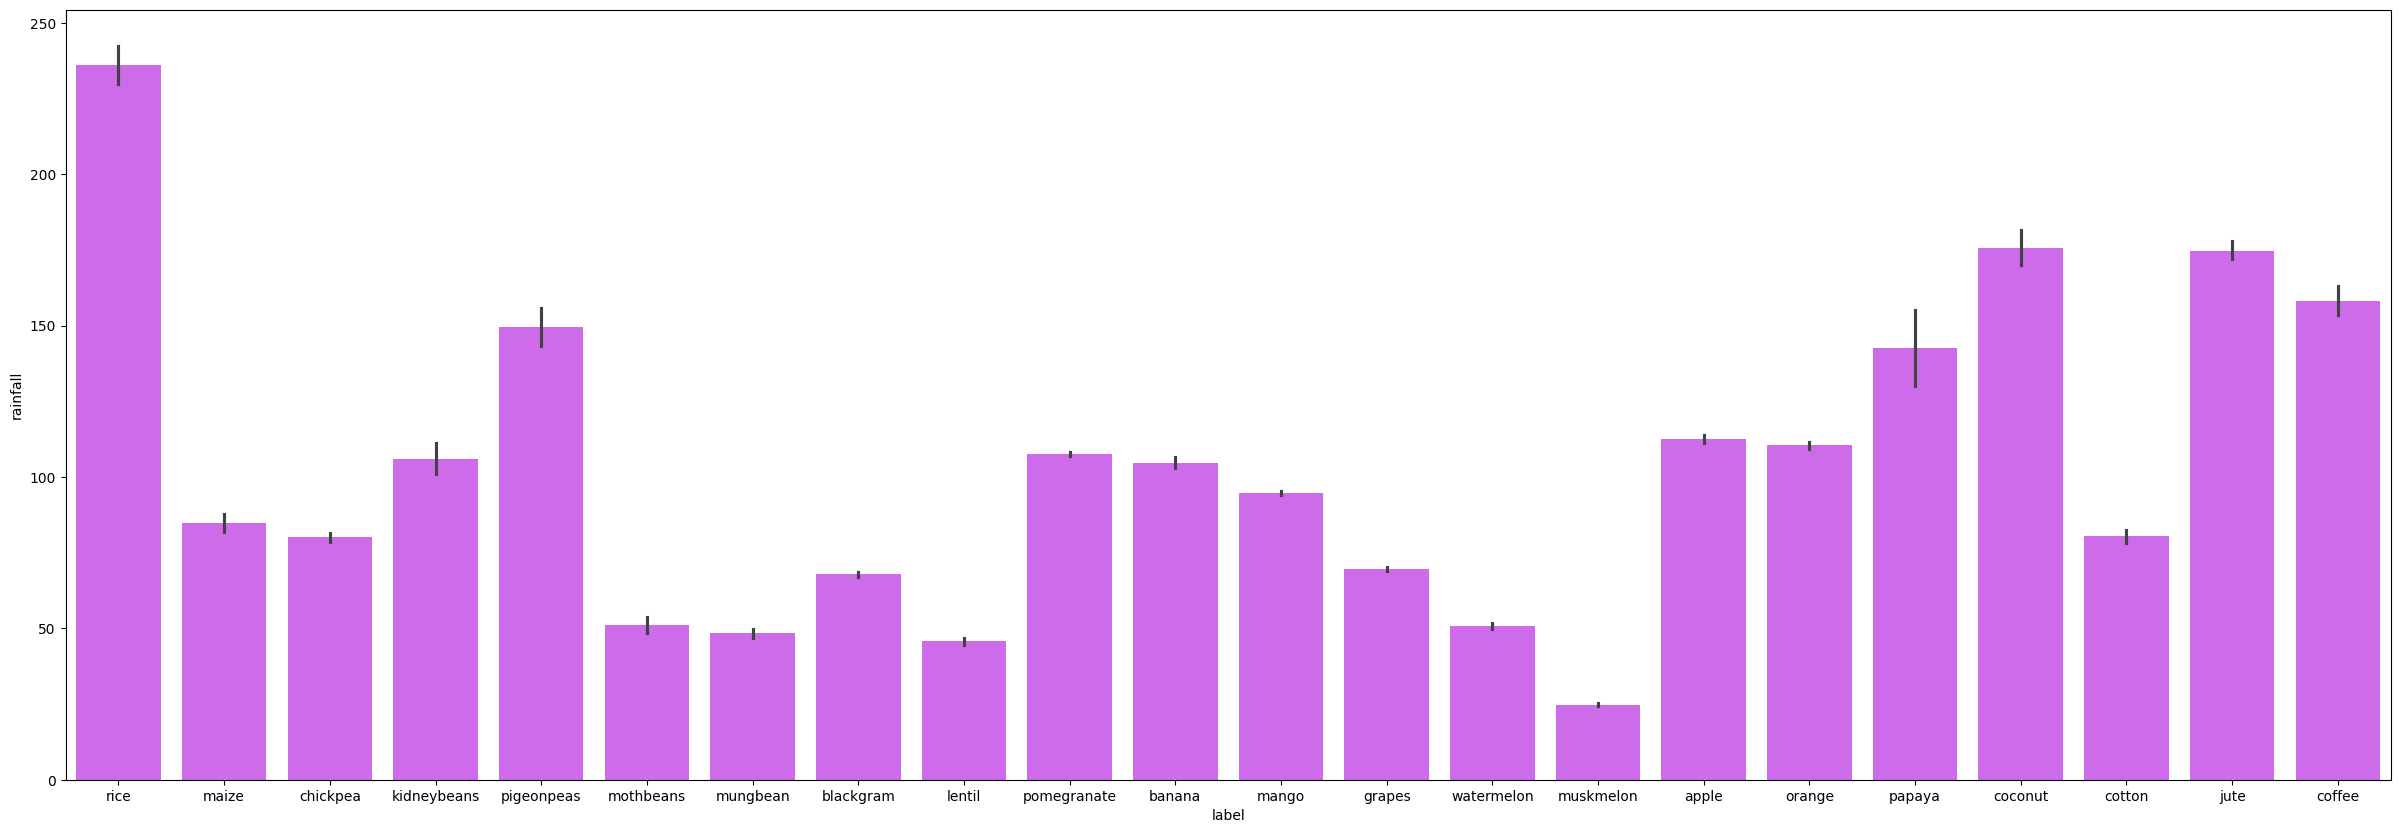

In [163]:
plt.figure(figsize=(30,10))
sns.barplot(x='label',y='rainfall',data=df,color="#DA56FF")

##### As we can see hear "Rice"  requires more "Rainfall" as compare to other crops

### Multivariate Analysis

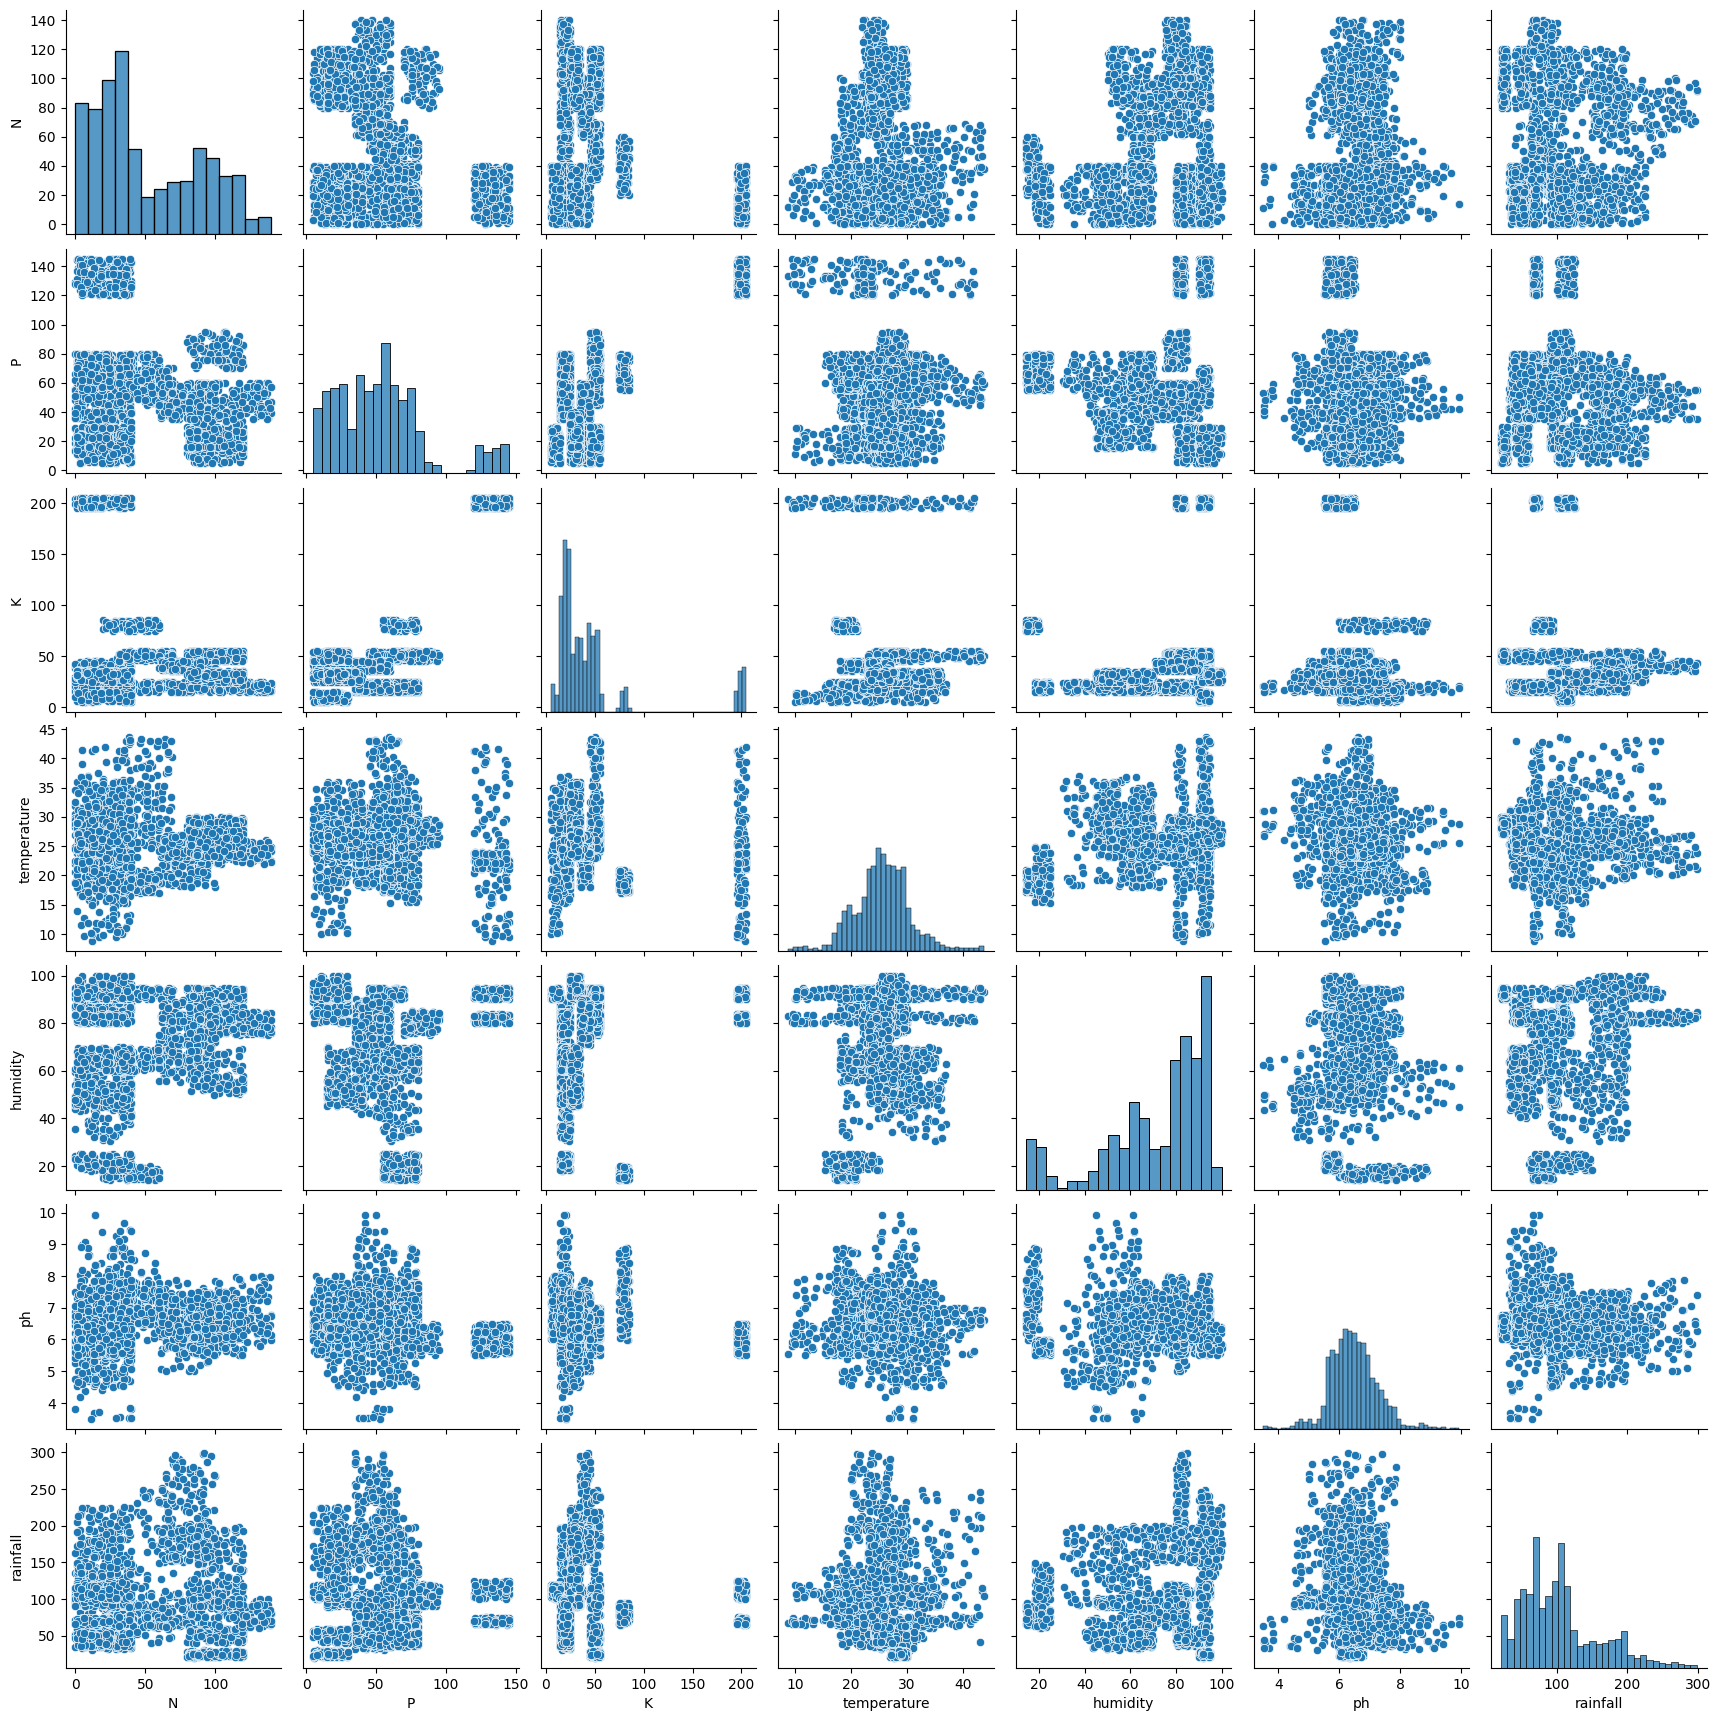

In [164]:
cmap=plt.viridis
sns.pairplot(df,diag_kind='hist',palette=cmap)

##### We can see hear the relation of "Features" & "Target" with eachother

### Encoding The Label Coulnm Using The LabelEncoder

In [165]:
num_col=[]
cat_col=[]

for i in df:
    if df[i].dtypes=="object":
        cat_col.append(i)
    else:
        num_col.append(i)


le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

<Axes: >

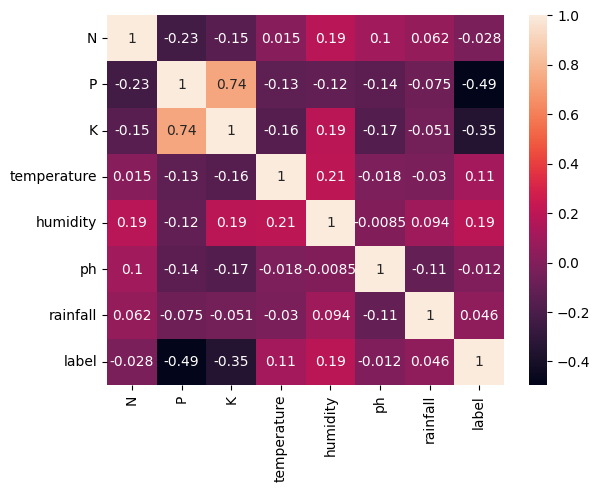

In [166]:
sns.heatmap(df.corr(),annot=True)

#### Hear we can see the co-realation of the column with each other.

### Checking for skewness in the dataset

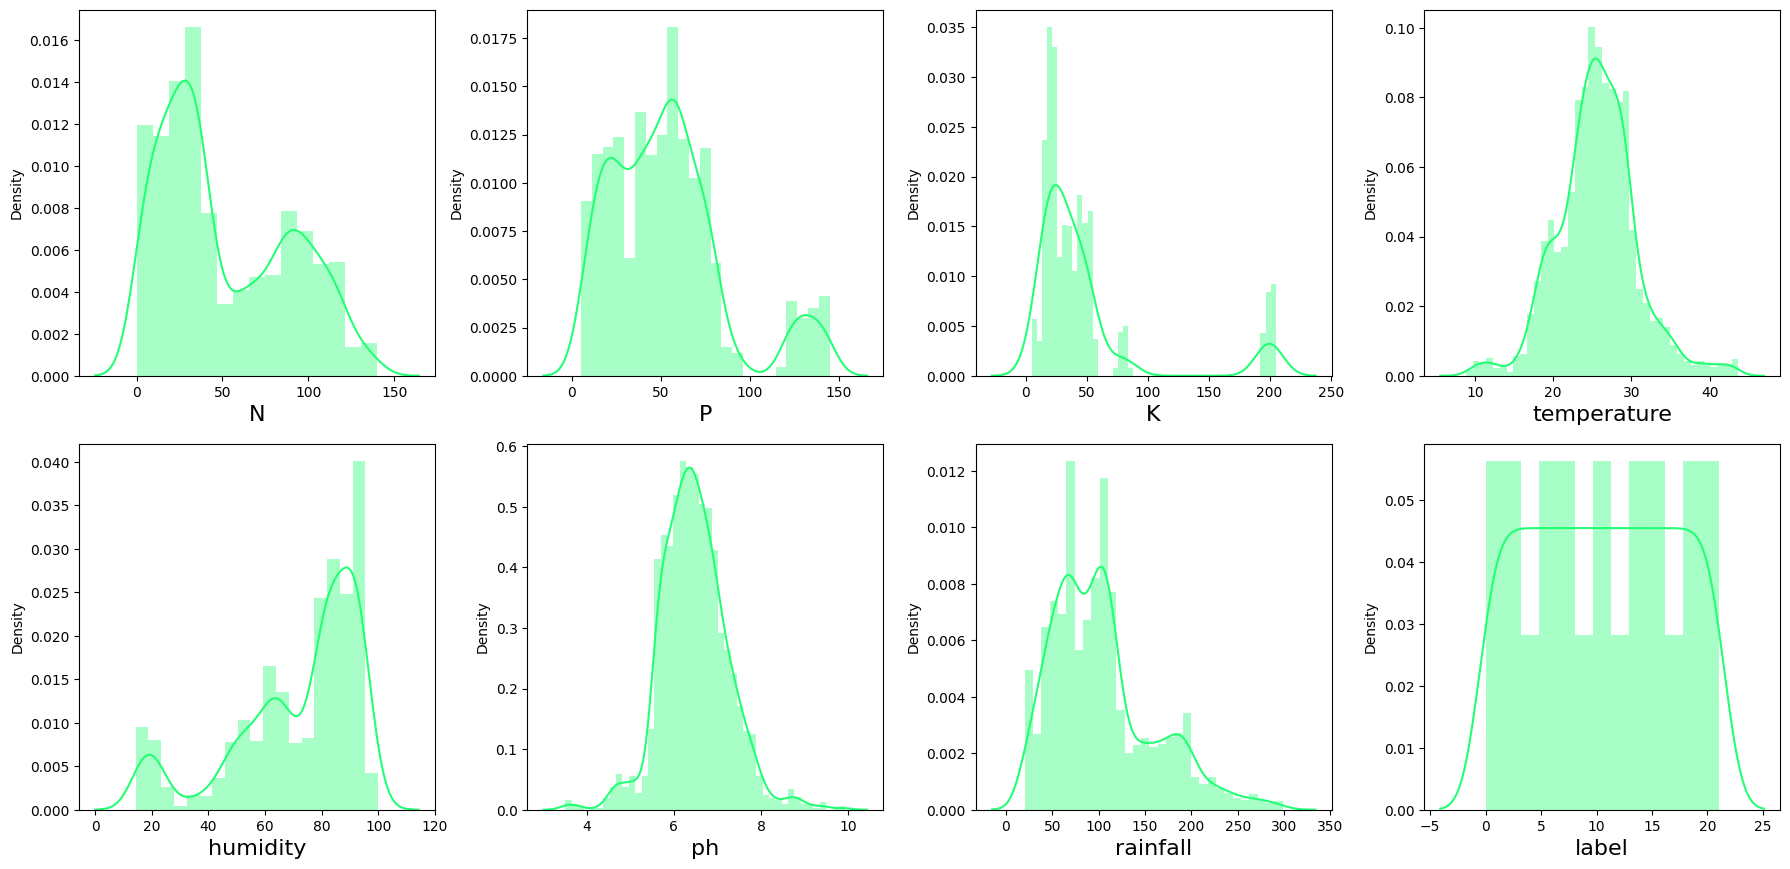

In [167]:
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(df[column],color="#23FF74")
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.tight_layout()

#### As we can see that the dataset is normally distributed

In [168]:
for col in cat_col:
    df[col] = le.inverse_transform(df[col])
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,82,36,42,20.879744,82.002744,6.502985,202.935536,rice
1,71,54,42,21.770462,80.319644,7.038096,226.655537,rice
2,72,51,38,23.004459,82.320763,7.840207,263.964248,rice
3,85,49,44,26.491096,80.158363,6.980401,242.864034,rice
4,91,48,35,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,117,16,26,26.774637,66.413269,6.780064,177.774507,coffee
2196,85,35,34,27.417112,56.636362,6.086922,127.924610,coffee
2197,106,17,33,24.131797,67.225123,6.362608,173.322839,coffee
2198,115,27,32,26.272418,52.127394,6.758793,127.175293,coffee


### Seperating features and target label

In [169]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [170]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [171]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

# Decision Tree

In [172]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
y= DecisionTree.score(Xtrain,Ytrain)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x*100)
model.append('Decision Tree')
print("DecisionTrees's Training Accuracy is: ", y*100)
print("DecisionTrees's Testing Accuracy is: ", x*100)
print("\n")

print(classification_report(Ytest,predicted_values))

DecisionTrees's Training Accuracy is:  96.36363636363636
DecisionTrees's Testing Accuracy is:  94.39393939393939


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      0.92      0.96        26
   blackgram       0.65      1.00      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      0.97      0.98        31
      coffee       1.00      0.97      0.98        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.75      1.00      0.86        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       0.96      0.72      0.82        32
       mango       0.97      1.00      0.99        33
   mothbeans       1.00      0.76      0.86        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1

##### Decision Tree gives the Training Accuracy of "93.50" and Testing Accuracy of "92.58"

## Cross validation score (Decision Tree)

In [173]:

score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.94090909, 0.90454545, 0.93181818, 0.925     , 0.93181818])

### Saving trained Decision Tree model

In [174]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

##### Hear we created the pickle file to save trained Decision Tree model

# Guassian Naive Bayes

In [175]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
y= NaiveBayes.score(Xtrain,Ytrain)
acc.append(x*100)
model.append('Naive Bayes')
print("Naive Bayes's Training Accuracy is: ", y*100)
print("Naive Bayes's Testing Accuracy is: ", x*100)
print("\n")

print(classification_report(Ytest,predicted_values))

Naive Bayes's Training Accuracy is:  99.54545454545455
Naive Bayes's Testing Accuracy is:  99.0909090909091


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00  

##### Naive Baye's gives the Training Accuracy of "99.61" and Testing Accuracy of "99.25"

## Cross validation score (NaiveBayes)

In [176]:

score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99318182, 0.99772727, 0.99318182, 0.99318182, 0.98863636])

### Saving trained Guassian Naive Bayes model

In [177]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

##### Hear we created the pickle file to save trained Naive Bayes model

# Support Vector Machine (SVM)

In [178]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
y= SVM.score(X_train_norm,Ytrain)
acc.append(x*100)
model.append('SVM')
print("SVM's Training Accuracy is: ", y*100)
print("SVM's Testing Accuracy is: ", x*100)
print("\n")

print(classification_report(Ytest,predicted_values))

SVM's Training Accuracy is:  99.41558441558442
SVM's Testing Accuracy is:  98.03030303030303


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.90      1.00      0.95        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.85      0.88      0.87        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.96      0.93      0.95        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1

##### Support Vector Machine gives the Training Accuracy of "99.22" and Testing Accuracy of "97.27"

## Cross validation score (SVM)

In [179]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98181818, 0.98409091, 0.98409091, 0.99090909, 0.98181818])

### Saving trained SVM model

In [180]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

##### Hear we created the pickle file to save trained NVM model

# Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
y= LogReg.score(Xtrain,Ytrain)
acc.append(x*100)
model.append('Logistic Regression')
print("Logistic Regression's Training Accuracy is: ", y*100)
print("Logistic Regression's Testing Accuracy is: ", x*100)
print("\n")

print(classification_report(Ytest,predicted_values))

Logistic Regression's Training Accuracy is:  97.07792207792207
Logistic Regression's Testing Accuracy is:  96.21212121212122


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.89      0.89      0.89        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      0.97      0.98        31
      coffee       0.94      1.00      0.97        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.94      0.91        33
 kidneybeans       0.97      0.97      0.97        30
      lentil       1.00      0.94      0.97        32
       maize       0.91      0.94      0.92        32
       mango       1.00      0.97      0.98        33
   mothbeans       0.82      0.97      0.89        29
    mungbean       0.97      1.00      0.98        32
   muskm

##### Logistic Regression gives the Training Accuracy of "96.81" and Testing Accuracy of "94.84"

## Cross validation score (Logistic Regression)

In [182]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.96818182, 0.95227273, 0.96363636, 0.95227273, 0.95681818])

### Saving trained Logistic Regression model

In [183]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

##### Hear we created the pickle file to save trained Logistic Regression model

# Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
y= RF.score(Xtrain,Ytrain)
acc.append(x*100)
model.append('RF')
print("RF's Training Accuracy is: ", y*100)
print("RF's Testing Accuracy is: ", x*100)
print("\n")

print(classification_report(Ytest,predicted_values))

RF's Training Accuracy is:  100.0
RF's Testing Accuracy is:  99.0909090909091


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.93      1.00      0.97        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      1.00      0.94        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.93      0.96        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
 

##### Random Forest gives the Training Accuracy of "100" and Testing Accuracy of "99.39"

# Cross validation score (Random Forest)

In [185]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 1.        , 0.99318182, 0.99545455, 0.99318182])

### Saving trained Random Forest model

In [186]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

##### Hear we created the pickle file to save trained Random Forest model

# XGBoost

In [187]:
num_col=[]
cat_col=[]

for i in df:
    if df[i].dtypes=="object":
        cat_col.append(i)
    else:
        num_col.append(i)


le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
y= XB.score(Xtrain,Ytrain)
acc.append(x*100)
model.append('XGBoost')
print("XGBoost's Training Accuracy is: ", y*100)
print("XGBoost's Testing Accuracy is: ", x*100)
print("\n")

print(classification_report(Ytest,predicted_values))

XGBoost's Training Accuracy is:  100.0
XGBoost's Testing Accuracy is:  98.93939393939394


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      0.91      0.95        33
           9       0.97      1.00      0.98        30
          10       0.97      1.00      0.98        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       1.00      0.97      0.98        29
          14       1.00      0.94      0.97        32
          15       1.00      1.00      1.00 

##### XG Boost gives the Training Accuracy of "100" and Testing Accuracy of "98.93"

# Cross validation score (XGBoost)

In [188]:
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99090909, 0.99318182, 0.99090909, 0.98863636, 0.98636364])

### Saving trained XGBoost model

In [189]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

##### Hear we created the pickle file to save trained XG Boost model

# Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

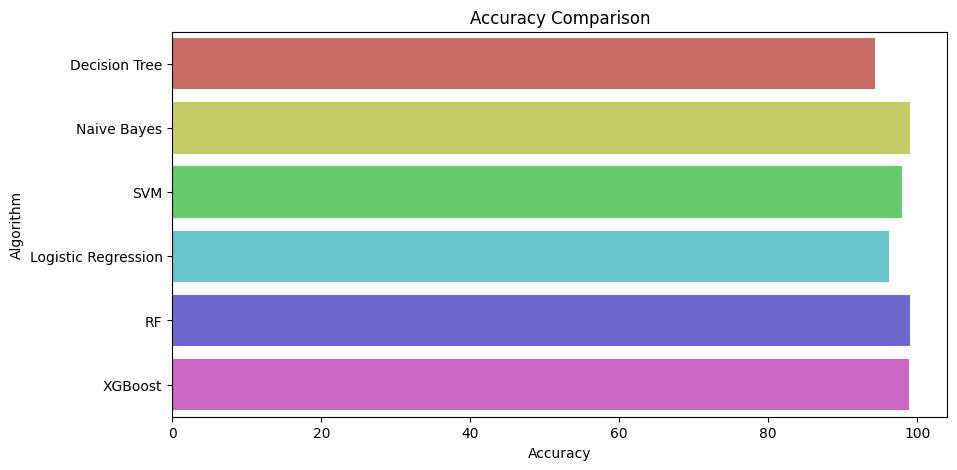

In [190]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='hls')

In [191]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '=', v)

Decision Tree = 94.39393939393939
Naive Bayes = 99.0909090909091
SVM = 98.03030303030303
Logistic Regression = 96.21212121212122
RF = 99.0909090909091
XGBoost = 98.93939393939394


##### Based on above models the Random Forest gives the best accuracy in training and testing as compare to other models.

# Conclusion: 
### By doing above modling we can say that the Random Forest is the best fitted model for predicting the fertilizer based on the Crops and the Environment that they are in.

### Random Prediction using Dummy Value On Random Forest

In [192]:
RF.predict([[109,19,54,27.04,91.34,6.37,25.081]])

array(['muskmelon'], dtype=object)

In [193]:
RF.predict([[8,59,15,31.46,48.17,7.064,165.50]])

array(['pigeonpeas'], dtype=object)

In [194]:
RF.predict([[64,37,43,20.879744,82.002744,6.502985,202.935536]])

array(['rice'], dtype=object)